### Custom GPT implementation

In [ ]:
%cd ../..
import torch
from inpainting.models import GPT
from inpainting.trainer import Trainer
from inpainting.datasets import MNIST
from inpainting.utils import configure_environment

configure_environment()

/home/ventus/.cache/pypoetry/virtualenvs/image-inpainting-rudDGIrt-py3.12/lib/python3.12/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


/home/ventus/image-inpainting


/home/ventus/.cache/pypoetry/virtualenvs/image-inpainting-rudDGIrt-py3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Seed set to 101190


Device set to cuda


In [2]:
mnist = MNIST(frac=0.05, clusters=35, unimask=False, shape=4)
weights = 1/mnist.distribution

In [ ]:
model = GPT(
    vocab_size = mnist.tokens,      # BERT's vocabulary size
    embed_size = mnist.tokens * 4,  # Hidden size
    num_layers = 4,                 # Number of Transformer layers
    num_heads = 4,                  # Numbertargets of attention heads
    max_len = (28//mnist.shape)**2, # Maximum sequence length
	ce_weights=weights,
	patches=mnist.itop(torch.arange(mnist.clusters)),
)

TypeError: GPT.__init__() missing 1 required positional argument: 'patches'

In [ ]:
Trainer(model, mnist).train(epochs=50, batch_size=100, lr=2e-4, warmup_steps=0)

running on device cuda
Epoch: 0.00	RMSE: 132.52	Loss: 3.05e+00	Learning Rate: 1.99e-04
Epoch: 0.00	RMSE: 68.84	Loss: 2.47e+00	Learning Rate: 1.97e-04
Epoch: 0.00	RMSE: 58.69	Loss: 1.91e+00	Learning Rate: 1.96e-04
Epoch: 1.00	RMSE: 59.56	Loss: 1.54e+00	Learning Rate: 1.95e-04
Epoch: 1.00	RMSE: 56.41	Loss: 1.34e+00	Learning Rate: 1.93e-04
Epoch: 1.00	RMSE: 59.90	Loss: 1.19e+00	Learning Rate: 1.92e-04
Epoch: 2.00	RMSE: 64.17	Loss: 1.22e+00	Learning Rate: 1.91e-04
Epoch: 2.00	RMSE: 60.62	Loss: 1.10e+00	Learning Rate: 1.89e-04
Epoch: 2.00	RMSE: 64.06	Loss: 1.05e+00	Learning Rate: 1.88e-04
Epoch: 3.00	RMSE: 62.66	Loss: 1.07e+00	Learning Rate: 1.87e-04
Epoch: 3.00	RMSE: 61.55	Loss: 1.05e+00	Learning Rate: 1.85e-04
Epoch: 3.00	RMSE: 67.13	Loss: 1.02e+00	Learning Rate: 1.84e-04
Epoch: 4.00	RMSE: 39.09	Loss: 1.03e+00	Learning Rate: 1.83e-04
Epoch: 4.00	RMSE: 41.81	Loss: 9.84e-01	Learning Rate: 1.81e-04
Epoch: 4.00	RMSE: 35.55	Loss: 9.75e-01	Learning Rate: 1.80e-04
Epoch: 5.00	RMSE: 36.84	Loss: 9

Traceback (most recent call last):
  File "/usr/lib64/python3.12/multiprocessing/util.py", line 303, in _run_finalizers
    finalizer()
  File "/usr/lib64/python3.12/multiprocessing/util.py", line 227, in __call__
    res = self._callback(*self._args, **self._kwargs)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib64/python3.12/multiprocessing/util.py", line 136, in _remove_temp_dir
    rmtree(tempdir, onerror=onerror)
  File "/usr/lib64/python3.12/shutil.py", line 759, in rmtree
    _rmtree_safe_fd(stack, onexc)
  File "/usr/lib64/python3.12/shutil.py", line 703, in _rmtree_safe_fd
    onexc(func, path, err)
  File "/usr/lib64/python3.12/shutil.py", line 750, in onexc
    return onerror(func, path, exc_info)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib64/python3.12/shutil.py", line 662, in _rmtree_safe_fd
    os.rmdir(name, dir_fd=dirfd)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-_7q_lov_'


Epoch: 46.00	RMSE: 53.25	Loss: 7.41e-01	Learning Rate: 1.20e-05
Epoch: 47.00	RMSE: 51.87	Loss: 6.71e-01	Learning Rate: 1.07e-05
Epoch: 47.00	RMSE: 53.91	Loss: 7.72e-01	Learning Rate: 9.33e-06
Epoch: 47.00	RMSE: 44.24	Loss: 7.74e-01	Learning Rate: 8.00e-06
Epoch: 48.00	RMSE: 43.23	Loss: 7.74e-01	Learning Rate: 6.67e-06
Epoch: 48.00	RMSE: 43.23	Loss: 7.35e-01	Learning Rate: 5.33e-06
Epoch: 48.00	RMSE: 42.66	Loss: 7.70e-01	Learning Rate: 4.00e-06
Epoch: 49.00	RMSE: 44.45	Loss: 7.96e-01	Learning Rate: 2.67e-06
Epoch: 49.00	RMSE: 43.18	Loss: 7.51e-01	Learning Rate: 1.33e-06
Epoch: 49.00	RMSE: 44.02	Loss: 7.69e-01	Learning Rate: 0.00e+00


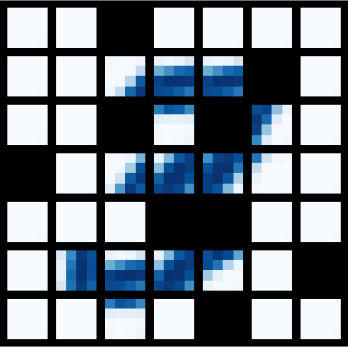

In [5]:
x = mnist[7]["input_ids"]
mnist.plot_sample(x)

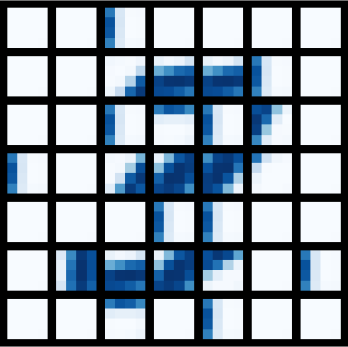

In [6]:
y = model(x.unsqueeze(0).cuda()).logits.argmax(dim=-1).cpu()
mnist.plot_sample(y)